In [1]:
#importing essential libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

In [2]:
#loading csv file of bengaluru realestate price downoaded from kaggle
df=pd.read_csv('C://Users//Bhavesh//bengaluru_home_price_dataset.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
#grouping the area_type inorder to analyze it and count it
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [4]:
#as analyzing mannually on the the dataset i found many feature are  less important so droping it
df1=df.drop(['area_type','availability','balcony','society'],axis='columns')
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [5]:
#finding null or naan values
print(df1.shape)
df1.isnull().sum()

(13320, 5)


location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [6]:
#we find a little amount of null values as size of dataset is 13320 so droping them will not effect the model much
df2=df1.dropna()
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
#no null values now analizing size manually give some unique attributes
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [9]:
#ML model understand only number so converting them
#creating a new column 
df2['bhk']=df2['size'].apply(lambda x:int(x.split(' ')[0]))
df2.head()

C:\Users\Bhavesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [10]:
#rechecking the bhk
df2['bhk'].unique()
#there are rooms with 43 27 seem like an error

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [11]:
#so checking for rooms more than 20
df2[df2.bhk>20]
#sqft is 2400 which is an error i will be tackiling it later

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [12]:
#now turns come for total sqft.....checking for uniques
df2['total_sqft'].unique()
#now solving this ranging numbers 1133 - 1384

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [13]:
#to solve this ranging number we should take its average
#but firstofll let  have look ow many ranging  number
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [14]:
#appling it on total sqft
df2[~df2['total_sqft'].apply(is_float)].head(10)
#~it will return back the false value

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [15]:
#so handling ranging ranging numbers 1133 - 1384
def convert_to_float(x):
    token=x.split('-')
    if len(token)==2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [16]:
convert_to_float('2100 - 2200')

2150.0

In [17]:
#first make a copy of it
#appling it to the total_sqft
df3=df2.copy()  #deep copy

In [18]:
df3.total_sqft = df3.total_sqft.apply(convert_to_float)

In [19]:
#seeing the previous location where ranging was founf ie 30
df3.loc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
bhk                   4
Name: 30, dtype: object

In [20]:
df4=df3.copy()#playing safe side...if data something goes wrong i will be having something to come up


In [21]:
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [22]:
#feature engineering where cleaning and soft going process takes place
#now I will be creating a feature name price_per_sq
df4['price_per_sq']=df4['price']*100000/df4['total_sqft']
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sq
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [23]:
#now comes the location part where it will be essential role for predicting price so let us analyze it
len(df4.location.unique())

1304

In [24]:
#1304 is huge amount for creating dummy variable,so this proble lies under the problem of dimensional curse
#whic can be tackle by creating other label for very less use locationlocation
#striping 
df4.location=df4.location.apply(lambda x:x.strip())
df4.location.head()

0    Electronic City Phase II
1            Chikka Tirupathi
2                 Uttarahalli
3          Lingadheeranahalli
4                    Kothanur
Name: location, dtype: object

In [25]:
#grouping it and finding the count of location
location_stats=df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield                                      535
Sarjapur  Road                                  392
Electronic City                                 304
Kanakpura Road                                  266
Thanisandra                                     236
Yelahanka                                       210
Uttarahalli                                     186
Hebbal                                          176
Marathahalli                                    175
Raja Rajeshwari Nagar                           171
Bannerghatta Road                               152
Hennur Road                                     150
7th Phase JP Nagar                              149
Haralur Road                                    141
Electronic City Phase II                        131
Rajaji Nagar                                    106
Chandapura                                       98
Bellandur                                        96
Hoodi                                            88
KR 

In [26]:
len(location_stats[location_stats<=10])

1052

In [27]:
#adding this location stats in other
#storing it in new variable 
location_stats_less_than_10=location_stats[location_stats<=10]
location_stats_less_than_10.head()

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
Name: location, dtype: int64

In [28]:
df4['location']=df4.location.apply(lambda x:'other' if x in location_stats_less_than_10 else x)

In [29]:
df4.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sq
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [30]:
df4.to_csv(path_or_buf='C://Users//Bhavesh//bengluru_hp.csv')

In [31]:
df4.shape

(13246, 7)

In [32]:
#now removing outlier using 4 deviation
df4.describe()

,total_sqft,bath,price,bhk,price_per_sq
count,13200.000000,13246.000000,13246.000000,13246.000000,1.320000e+04
mean,1555.302783,2.692586,112.389392,2.801902,7.920759e+03
std,1237.323445,1.341506,149.076587,1.295758,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267701e+03
50%,1275.000000,2.000000,72.000000,3.000000,5.438331e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317073e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [33]:
#treating outliers with percentile
max_thresold=df4['price_per_sq'].quantile(.999)
min_thresold=df4['price_per_sq'].quantile(.001)
print('max thresold : ',max_thresold)
print('min thresold', min_thresold)



max thresold :  50959.580419581405
min thresold 1366.755485893417


In [34]:
#let us remove it
#len(df4[df4['price_per_sq']>max_thresold]) + len(df4[df4['price_per_sq']<min_thresold])
df5=df4[(df4['price_per_sq']<max_thresold) & (df4['price_per_sq']>min_thresold)]
df5.shape

(13172, 7)

In [35]:
#now removing outlier using 4 deviation 
upper_limit=df5.price_per_sq.mean() + 1*df5.price_per_sq.std()
lower_limit=df5.price_per_sq.mean() - 1*df5.price_per_sq.std()
print('upper limit : ',upper_limit)
print('lower limit : ',lower_limit)

upper limit :  10805.085314251523
lower limit :  2523.0674817691997


In [36]:
len(df5[df5['price_per_sq']>upper_limit]) + len(df5[df5['price_per_sq']<lower_limit])

1634

In [37]:
df6=df5[(df5['price_per_sq']<upper_limit) & (df5['price_per_sq']>lower_limit)]
df6.shape

(11538, 7)

In [38]:
#now removing 1 deviation
#now removing outlier using 4 deviation 
upper_limit4=df5.price_per_sq.mean() + 4*df5.price_per_sq.std()
lower_limit4=df5.price_per_sq.mean() - 4*df5.price_per_sq.std()
print('upper limit : ',upper_limit4)
print('lower limit : ',lower_limit4)

upper limit :  23228.112062975008
lower limit :  -9899.959266954284


In [39]:
df7=df6[(df6['price_per_sq']<upper_limit4) & (df6['price_per_sq']>lower_limit4)]
df7.shape

(11538, 7)

In [40]:
#plotting graph 
import matplotlib
def plot(df,location):
    bhk2=df[(df.location==location) & (df.bhk==2)]
    bhk3=df[(df.location==location) & (df.bhk==3)]
    plt.scatter(bhk2.total_sqft,bhk2.price,color='red',label='2bhk')
    plt.scatter(bhk3.total_sqft,bhk3.price,color='green',label='3bhk',marker='*')
    plt.xlabel('total_sqf')
    plt.ylabel('price')
    plt.title('location')
    plt.legend

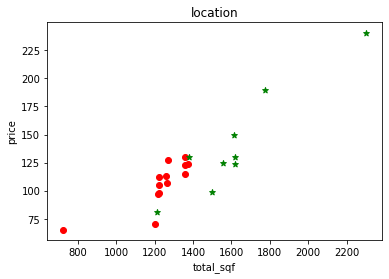

In [41]:
plot(df7,'Rajaji Nagar')

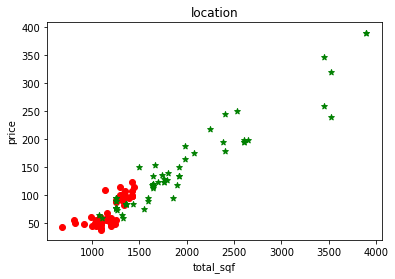

In [42]:
plot(df7,'Hebbal')

In [43]:
#vreating new csv for futher cleaning concpt in practicr
df6.to_csv(path_or_buf='C://Users//Bhavesh//bengluru_hp_clean1.csv')

In [44]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sq),
                'std': np.std(bhk_df.price_per_sq),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sq<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
df8.shape

(8253, 7)

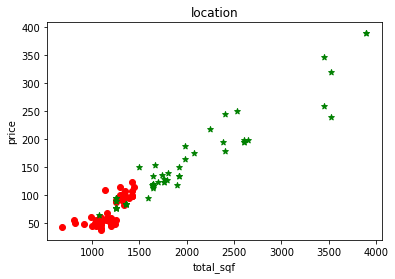

In [45]:
plot(df8,'Hebbal')

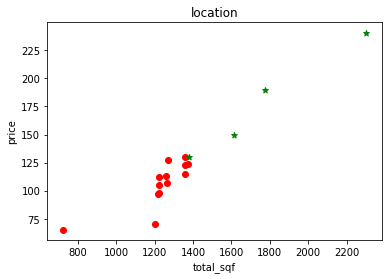

In [46]:
plot(df8,'Rajaji Nagar')

In [47]:
df8.bath.unique()

array([ 2.,  3.,  4.,  5.,  1.,  8.,  7.,  6.,  9., 27., 12., 10., 16.,
       15., 13., 11.])

In [48]:
df8[df8['bath']>8]

,location,size,total_sqft,bath,price,bhk,price_per_sq
459,other,11 BHK,5000.0,9.0,360.0,11,7200.000000
538,Mico Layout,9 BHK,5000.0,9.0,210.0,9,4200.000000
1718,other,27 BHK,8000.0,27.0,230.0,27,2875.000000
1937,other,9 Bedroom,1200.0,9.0,120.0,9,10000.000000
1953,KR Puram,8 Bedroom,1200.0,12.0,110.0,8,9166.666667
2620,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689
2815,Vidyaranyapura,9 Bedroom,1200.0,9.0,100.0,9,8333.333333
2826,Kadugodi,9 Bedroom,6200.0,9.0,200.0,9,3225.806452
3523,Jigani,10 Bedroom,1200.0,10.0,105.0,10,8750.000000
3609,other,16 BHK,10000.0,16.0,550.0,16,5500.000000


Text(0, 0.5, 'counts')

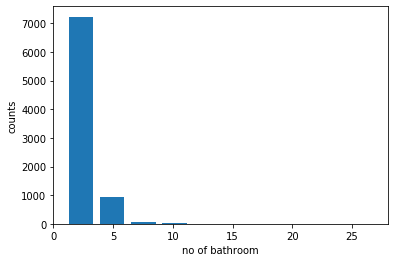

In [49]:
#ploting histogram
plt.hist(df8.bath,rwidth=.8)
plt.xlabel('no of bathroom')
plt.ylabel('counts')

In [50]:
df9=df8[df8.bath<df8.bhk+2]

In [51]:
df9.shape

(8167, 7)

In [52]:
df8.shape

(8253, 7)

In [53]:
df10=df9.drop(['size','price_per_sq'],axis='columns')
df10.shape

(8167, 5)

In [54]:
#training testing
#creating dummies
dummies=pd.get_dummies(df10.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df11=pd.concat([df10,dummies],axis='columns')

In [56]:
df11=df11.drop(['other'],axis='columns')


In [57]:
df11=df11.drop(['location'],axis='columns')

In [58]:
df11.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,39.07,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,62.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,95.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,51.00,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2732.0,4.0,204.00,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
from sklearn.model_selection import train_test_split
x=df11.drop(['price'],axis='columns')
y=df11.price
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [81]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.7916300196276299

In [73]:
#now using k fold cross valdiation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit #shuffle split will randoized the sample
#cv=ShuffleSplit(n_splits=5,test_size=.2)

In [86]:
cross_val_score(LinearRegression(),x,y,cv=5)

array([ 8.92575082e-01,  8.47127705e-01,  8.24174328e-01, -6.85384763e+14,
        8.08631759e-01])

In [72]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([-2.03329784e+15,  8.29586608e-01,  8.98652143e-01,  8.44245713e-01,
        8.43631963e-01])

In [83]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

In [84]:
dt.fit(X_train,y_train)
dt.score(X_test,y_test)

0.7150064318351284

In [85]:
cross_val_score(DecisionTreeRegressor(), x, y, cv=cv)

array([0.74402094, 0.74082409, 0.67791608, 0.75342413, 0.75335008])

In [87]:
from sklearn.linear_model import Lasso
l=Lasso()
l.fit(X_train,y_train)
l.score(X_test,y_test)

0.7491695266133376